# Curso Análisis de Redes

## Cátedra Teoría de las Telecomunicaciones - Universidad ORT Uruguay



# Cadenas de Markov de Tiempo Continuo (2a. Parte)

In [1]:
#using Pkg;Pkg.instantiate();Pkg.update()

## Versión constructiva de una cadena de Markov de tiempo continuo.

Sea $X(t)$ una CMTC con generador infinitesimal $Q$. Entonces necesariamente:

* La cadena se queda un tiempo exponencial de parámetro $q_i = -q_{ii}$ en el estado $i$.
* Al cabo de ese tiempo, salta de $i\to j$ con probabilidad:

$$\frac{q_{ij}}{q_i} \quad j\neq i.$$

![trayectoria](../images/trayectoria.png)

## Ejemplo: cadena ON-OFF

Es una cadena con dos estados, $OFF$ y $ON$ (indicados por $0$ y $1$) y tasas:

![Cadena ON OFF](../images/cadena_on_off.png)

Equivalentemente:

$$Q=\begin{pmatrix}
-\lambda & \lambda \\
\mu & -\mu
\end{pmatrix}.$$

¿Qué ocurre cuando $t\to\infty$?

### La probabilidad en tiempo $t$.

Sea $\pi(0) = (\pi_0(0), \pi_1(0))$ la probabilidad inicial de estar en cada estado. Vimos que la probabilidad en tiempo $t$ satisface:

$$\dot{\pi} = \pi Q,$$

que es una ecuación diferencial lineal. Escribamos cada componente:

$$\begin{align}
\dot{\pi}_0 &= -\lambda \pi_0 + \mu \pi_1, \\
\dot{\pi}_1 &= \lambda \pi_0 - \mu \pi_1.
\end{align}$$

**Observación:** si sumamos las ecuaciones nos queda $\dot\pi_0 + \dot\pi_1 = 0$ por lo que $\pi_0+\pi_1$ es constante. Esto tiene sentido: si comenzamos con un vector de probabilidad esto debe mantenerse. Esto es consecuencia de que $Q\mathbf{1} = 0$.

### La probabilidad en tiempo $t$: solución

Dado que ambas ecuaciones son complementarias, escribimos $\pi_1 = 1-\pi_0$ y sustituimos obteniendo una ec. diferencial lineal en una variable:

$$\dot{\pi}_0 = -\lambda\pi_0 +\mu - \mu\pi_0 = -(\lambda + \mu) \pi_0 + \mu.$$

La ec. anterior es la de carga de un capacitor (con condición inciial $\pi_0(0)$) cuya solución es:

$$\pi_0(t) = \frac{\mu}{\lambda+\mu} + \left(\pi_0(0) - \frac{\mu}{\lambda+\mu} \right)e^{-(\lambda+\mu)t}.$$

De donde $\pi_1(t) = 1-\pi_0(t)$. En particular:

$$\pi(t) = (\pi_0(t), \pi_1(t)) \to_{t\to\infty} \left(\frac{\mu}{\lambda + \mu}, \quad \frac{\lambda}{\lambda+\mu}\right).$$

### Ejemplo: $\lambda=1$, $\mu=2$, $\pi(0) = (1,0)$ 

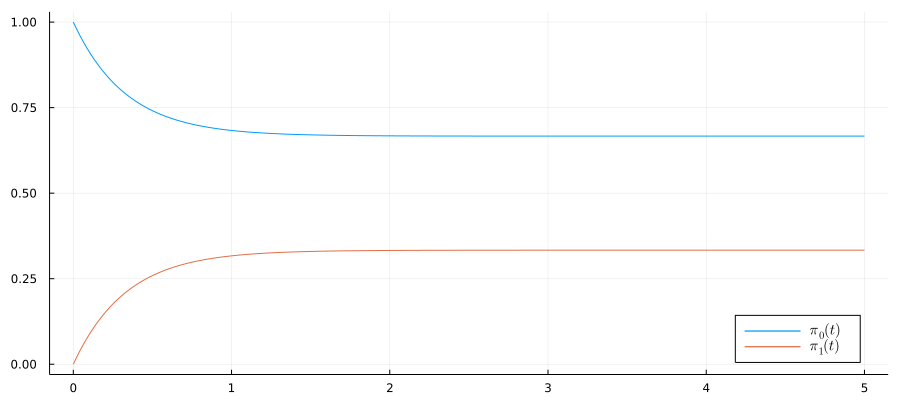

In [9]:
using Plots, LaTeXStrings
default(size=(900,400), legend=:bottomright, legendfontsize=10)

#Defino la función pi0(t)
pi0(t,lambda,mu,pi0_inicial) = mu/(lambda+mu) + (pi0_inicial-mu/(lambda+mu))*exp(-(lambda+mu)*t)

t=(0:.01:5)

#calculo pi0(t) para cada t
pi0t = pi0.(t,1.0,2.0,1.0)
pi1t = 1 .- pi0t
plot(t,pi0t , label=L"\pi_0(t)")
plot!(t,pi1t , label=L"\pi_1(t)")


### Ejemplo: $\lambda=1$, $\mu=2$, $\pi(0) = (0.5,0.5)$ 

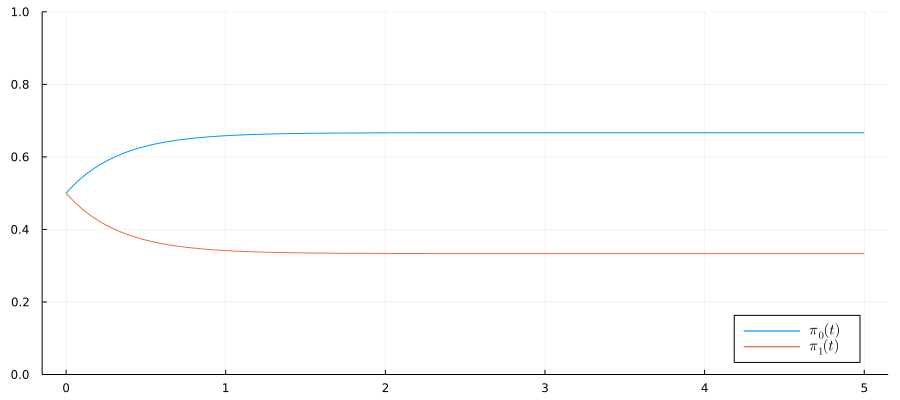

In [10]:
#recalculo y ploteo para la nueva condicion inicial

pi0t = pi0.(t,1.0,2.0,0.5)
pi1t = 1 .- pi0t
plot(t,pi0t , label=L"\pi_0(t)" ,ylims=(0,1))
plot!(t,pi1t , label=L"\pi_1(t)")


### Observaciones:

* La cadena converge a la misma distribución de equilibrio para cualquier condición inicial.

* La distribución de equilibrio depende de $\lambda/\mu$, pero no de los valores absolutos de las frecuencias.

* La constante de tiempo de la convergencia es $\lambda+\mu$, esta sí depende de las frecuencias (cadenas más lentas demoran más en llegar a régimen).


### Interpretación de la condición de equilibrio:

$$\pi_0 = \frac{\mu}{\lambda+\mu} = \frac{1/\lambda}{1/\lambda+1/\mu}.$$

Escrito así, es el tiempo medio que permanezco en $0$, dividido el tiempo medio "de ciclo", es decir, salir y volver.

### Cálculo de la distribución de régimen

Observemos que para calcular la distribución de régimen hay que plantear únicamente $\dot{\pi}=0$. Es decir:

$$\pi Q = 0.$$

Esta ecuación es la *ecuación de balance global* en tiempo continuo. En este caso:

$$\left\{\begin{align}
-\lambda \pi_0 + \mu \pi_1 &= 0, \\ 
\lambda \pi_0 - \mu \pi_1 &= 0.
\end{align}\right.$$

Nuevamente, estas ecuaciones no son linealmente independientes (porque $Q\mathbf{1} = 0$) pero utilizando la condición adicional $\pi_0+\pi_1=1$ concluimos que:

$$\pi_1 = 1-\pi_0 = \frac{\lambda}{\mu} \pi_0 \Rightarrow \pi_0 = \frac{1}{1+\lambda/\mu} = \frac{\mu}{\lambda+\mu}.$$

Notar la analogía con el caso discreto.

### Simulación:

In [12]:
using Distributions

function simula_ON_OFF(lambda, mu, pi0, Tfinal)
    #lambda: tasa de OFF->ON
    #mu: tasa de ON->OFF
    #pi: distribución para sortear el estado inicial
    #Tfinal: tiempo de simulación
    
    d0 = Categorical(pi0)    
    d1 = Exponential(1/lambda)
    d2 = Exponential(1/mu)
    
    x=rand(d0) - 1 ## El -1 es para que el estado inicial sea 0 o 1 y no 1 o 2.
    t=0.0
    X=[x];
    T=[t];
    
    while t<Tfinal
        if x==0
            dt = rand(d1)
            x=1;
        else
            dt = rand(d2)
            x=0
        end
        t=t+dt
        push!(T,t)
        push!(X,x)
    end
    
    return T,X
    
end


simula_ON_OFF (generic function with 1 method)

### Resultado

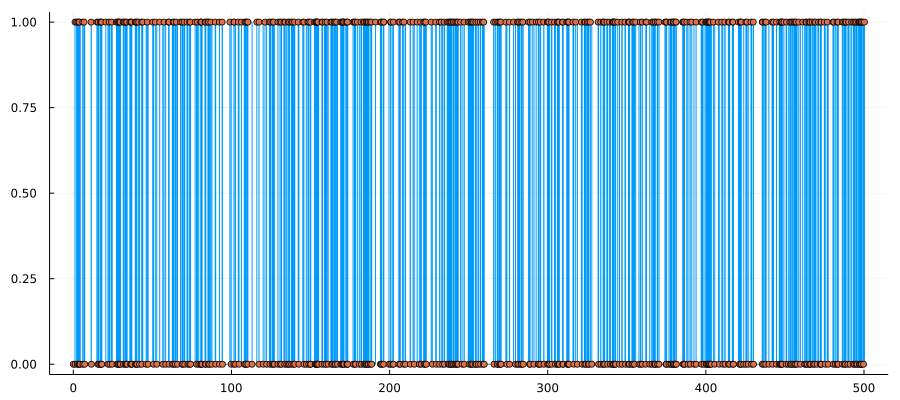

In [19]:
lambda = 1.0
mu = 2.0
pi_inicial = [1.0,0.0]
Tfinal = 500.0

T,X = simula_ON_OFF(lambda,mu,pi_inicial,Tfinal)
plot(T,X,lt=:steppost, legend=:none)
scatter!(T,X)

### Ocupación de estados y valor medio.

Calculemos en este caso algunas medidas empíricas para la cadena y veamos que coinciden con el régimen. En particular consideremos (en régimen):

$$\bar{X} = E[X(t)] = \sum_i i \pi_i = 0\left(\frac{\mu}{\lambda+\mu}\right) + 1 \left( \frac{\lambda}{\lambda+\mu}\right) = \frac{\lambda}{\lambda+\mu}.$$

Que para el ejemplo analizado antes toma un valor de $\bar{X} = 1/3$. Dicha medida debería coincidir (si vale una ley de grandes números) con:

$$\lim_{T\to\infty} \frac{1}{T} \int_0^T X(s)ds.$$

es decir, el valor medio de la señal aleatoria converge siempre a la esperanza en régimen.

### Cálculo del valor medio:

Como la función $X(t)$ es constante a tramos, puede verse que:

$$\int_0^{T_n} X(s)ds = \sum_{i=0}^{n-1} X_i (T_{i+1}-T_i),$$

siendo $T_i$ los tiempos de salto, y $X_i = X(T_i)$, el valor a donde salta. En este caso elegimos calcular hasta un último tiempo de salto (si no hay que corregir el último término).

In [20]:
### Calculo del valor medio:

Xbar = sum(X[1:end-1].*diff(T))/T[end]

0.3320423476265905

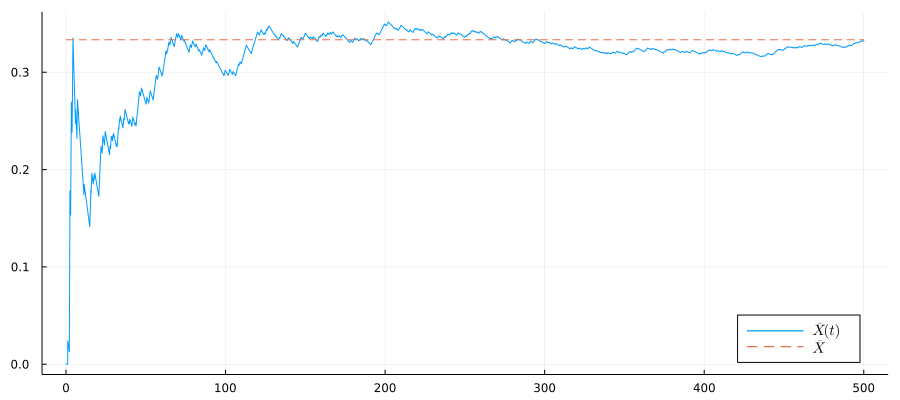

In [21]:
## Evolucion

Xbart = zeros(length(T));
for i=1:length(T)-1
    Xbart[i+1] = sum(X[1:i].*diff(T[1:i+1]))/T[i+1]
end

plot(T,Xbart, label=L"\bar{X}(t)")
plot!(T,lambda/(lambda+mu)*ones(size(T)), label=L"\bar{X}", ls=:dash)

### Cálculo de la probabildad de estado

Análogamente podemos calcular la proporción de tiempo que se visita el estado $i$:

$$\bar{\pi}_i = \lim_{T\to\infty} \frac{1}{T} \int_0^T \mathbf{1}_{\{X(s)=i\}} ds,$$

siendo $\mathbf{1}_{\{X(s)=i\}}$ una función que vale $1$ si $X(s)=i$ y $0$ si no. Notar que la integral "suma" los tiempos de visita a $i$ y luego divide entre $T$. Podemos hacer esto con el mismo truco de arriba (en el fondo es el valor medio de la señal $g(X) = \mathbf{1}_{\{X=i\}}$.

In [26]:
### Calculo de la proporción de tiempo en 0:

pi0bar = sum((X[1:end-1].==0).*diff(T))/T[end]

0.6679576523734094

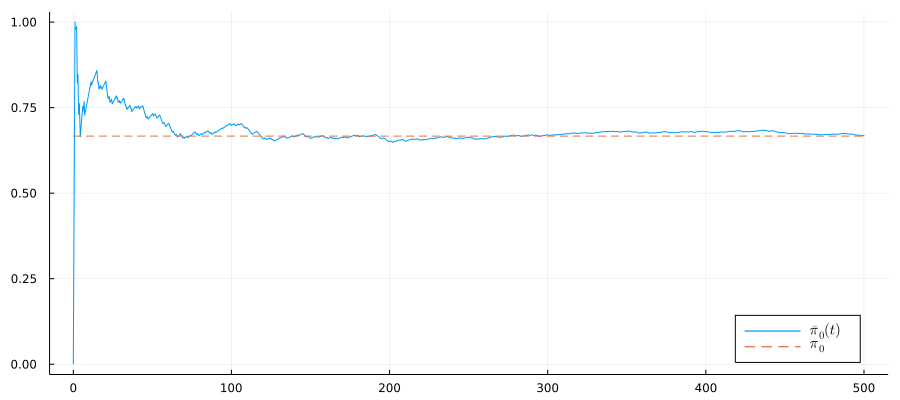

In [27]:
## Evolucion

pi0bart = zeros(length(T));
for i=1:length(T)-1
    pi0bart[i+1] = sum((X[1:i].==0).*diff(T[1:i+1]))/T[i+1]
end

plot(T,pi0bart, label=L"\bar{\pi}_0(t)")
plot!(T,mu/(lambda+mu)*ones(size(T)), label=L"\pi_0", ls=:dash)

### Relación con el semigrupo de transición

¿Podemos calcular la matriz $P(t)$ en este caso? ¿Qué ocurre cuando $t\to\infty$?

**Respuesta:** La solución de $P(t)$ es muy parecida a la de $\pi(t)$ ya calculada, pero hagámosla numéricamente.

In [28]:
Q=[-lambda lambda;mu -mu]

2×2 Matrix{Float64}:
 -1.0   1.0
  2.0  -2.0

In [32]:
t=10.0  ##Variar t para ver la convergencia
P=exp(Q*t) 

2×2 Matrix{Float64}:
 0.666667  0.333333
 0.666667  0.333333

### Conclusiones:

A través de este ejemplo hemos analizado el comportamiento asintótico de una CMTC en un caso simple (donde hasta el semigrupo de transición se puede calcular explícitamente).

En general, estudiar $\pi(t)$ o $P(t)$ en detalle no es posible analíticamente, pero surgen las mismas preguntas que en tiempo discreto:

* ¿Existe el límite de $\pi(t)$ cuando $t\to\infty$?
* ¿Es único? ¿Depende de la condición inicial?
* ¿Cómo se relaciona con los promedios temporales?

Para la cadena ON-OFF vimos que el límite es único para cualquier condición inicial, y que conicide con los promedios temporales. ¿Qué debe cumplir la cadena para que esto sea cierto?

## Clasificación de estados de Cadenas de Markov de tiempo continuo

### Conexión, irreducibilidad

> **Definición:** Dos estados $i$, $j$ están conectados si y solo si existen estados intermedios $i_1,\ldots,i_m$ y $j_1,\ldots,j_n$ tales que:
>
> $$q_{ii_1}q_{i_1i_2}\ldots q_{i_m j} >0 \quad \text{y} \quad q_{jj_1}q_{i_1i_2}\ldots q_{j_n i} >0.$$
>
> Es decir, un camino de ida y vuelta en el grafo.

> **Definición:** Una cadena se dice *irreducible* si y solo si todos sus estados están conectados.

### Recurrencia, transitoriedad

Definamos primero $\tau_i^{\to} = \inf\{t:X(t)\neq i\}$, el tiempo de salida de $i$. recordemos que si la cadena arranca en $i$ este tiempo es exponencial de parámetro $q_i = -q_{ii}$.

> **Definición:** Un estado se dice *recurrente* si y solo si:
>
> $$P(X(t)=i \text{ para algún }t>\tau_{i}^\to \mid X(0)=i) = 1$$
>
> En otro caso se dice *transitorio*.

Sea además $\tau_i$ el "tiempo de primer retorno al estado $i$", es decir, la primera vez que se visita a $i$ después del tiempo $\ŧau_i^\to$:

$$\tau_i = \inf\{t>\tau_i^\to: X(t)=i\}$$

Entonces un estado recurrente se dice:

* *Recurrente positivo* si y solo si $E[\tau_i \mid X(0)=i]<\infty$.
* *Recurrente nulo* si y solo si $E[\tau_i \mid X(0)=i]=\infty$.

Todas estas definiciones son las análogas a tiempo discreto. En particular se cumple que *si una cadena es irreducible, todos los estados son del mismo tipo*.

## Cadenas ergódicas

Una cadena irreducible y recurrente positiva se dice *ergódica*.

> **Teorema:** Si una cadena es ergódica, entonces existe:
>
>$$\pi = \lim_{t\to \infty} \pi(t) =  \lim_{t\to \infty} \pi(0)P(t).$$
>
> Dicho límite no depende de $\pi(0)$, y verifica las ecuaciones de balance global:
>
> $$\pi: \left\{\begin{array}{cc}\pi Q = 0 \\ \pi \mathbf{1} = 1\end{array}\right.$$
>
> Además, si $\tau_i$ es el tiempo de retorno a $i$ se verifica que:
>
> $$\pi_i = \frac{1}{q_i E[\tau_i]} > 0 \quad \forall i.$$

Esta última ecuación se interpreta como.

$$\pi_i = \frac{\text{Tiempo medio de permanencia en $i$}}{\text{Tiempo medio de retorno o ciclo a $i$}} = \frac{E[\tau_i^\to]}{E[\tau_i]}= \frac{1/q_i}{E[\tau_i]}$$

### ¿Hay cadenas continuas periódicas?

No, no hay. No hay un equivalente a la noción de periodicidad de tiempo discreto.

La razón es que los tiempos aleatorios exponenciales "limpian" el fenómeno de la periodicidad, porque la probabilidad de que dos tiempos coincidan por ejemplo es $0$.

Por lo tanto, no hay que chequear noción de periodicidad en las cadenas continuas. Es un artificio del tiempo discreto.

**Observación:** La cadena ON-OFF es "periódica" en el sentido de que siempre alterna de la misma manera entre dos estados, pero no es periódica si miramos los *tiempos* que permanece en cada uno (la onda cuadrada aleatoria).

## Criterio de ergodicidad para cadenas finitas

La recurrencia positiva es la condición más difícil de chequear. Por suerte esto es "gratis" en el caso finito:

> **Teorema:** Si una cadena de tiempo continuo es *finita* e *irreducible*, entonces es necesariamente ergódica y tendrá un régimen bien definido (necesariamente visita todos los estados).
>
> El régimen se calcula resolviendo las ecuaciones de balance global.

## Criterio de ergodicidad para cadenas infinitas

> **Teorema:** Si una cadena de tiempo continuo es *irreducible* y existe **una única solución** de las ecuaciones de balance global:
>
> $$\pi: \left\{\begin{array}{l}\pi Q = 0 \\ \pi \mathbf{1} = 1\end{array}\right.$$
>
> que además verifica $\pi_i>0$ $\forall i$, entonces la cadena es ergódica y $\pi$ es su distribución invariante. En otro caso la cadena es transitoria o recurrente nula.

Estos teoremas coinciden con el caso de tiempo discreto ya estudiado.

## Interpretación de las ecuaciones de balance:

Escribamos la ecuación $j$ de las ecuaciones de balance $\pi Q = 0$:

$$\sum_{i\in E} \pi_i q_{ij} = 0.$$

Pasando el término de la diagonal para el otro lado queda:

$$\sum_{i\neq j} \pi_i q_{ij} = -q_{jj}\pi_j.$$

O equivalentemente, de forma más simétrica:
$$\sum_{i\neq j} \pi_i q_{ij} = \sum_{i\neq j} \pi_jq_{ji}.$$

Esto debe leerse como "la frecuencia con que se observan transiciones hacia fuera de $j$ se balancea con la frecuencia con que observamos transiciones hacia $j$". Con este criterio, se pueden escribir directamente las ecuaciones de balance del grafo de la cadena, sin pasar por la matriz $Q$. 

### Diagrama

![Balance global](../images/global_balance.png)

## Cadenas de Markov y relojes exponenciales

Hasta ahora vimos dos maneras de entender las trayectorias de una CMTC $X(t)$:

1. Como un proceso que cumple la propiedad de Markov y tiene un semigrupo de transición $P(t)$.

2. La versión constructiva: dado el generador $Q$, la cadena:

    1. Se queda un tiempo exponencial $q_i = -q_{ii}$ en el estado $i$.
    
    2. Al cabo de dicho tiempo, salta al estado $j$ con probabilidad $q_{ij}/q_i$.
    
    
Existe una tercera construcción que se basa en la propiedad del mínimo de exponenciales que ya vimos.

### Mínimo de v.a. exponenciales

Supongamos que $X_1,\ldots, X_n$ son variables aleatorias exponenciales independientes, cada una de ellas con parámetro $\lambda_i$.

Entonces se cumple que:

1. $X = \min\{X_1,\ldots,X_n\}$ tiene distribución exponencial de parámetro $\lambda = \lambda_1+\ldots+\lambda_n$.

2. $P(X=X_i) = \lambda_i/\lambda$.

### Construcción alternativa de una Cadena de Markov de tiempo continuo

Reemplazando $\lambda_j$ por $q_{ij}$ en el teorema anterior, tenemos la siguiente construcción alternativa de una cadena de Markov:

1. Al llegar al estado $i$, para cada $j$ con $q_{ij}>0$ sorteo un tiempo exponencial de parámetro $q_{ij}$ (a esto le llamamos un reloj exponencial).

2. Considero el primero de los relojes que "suena" (el contador que termina primero). El que "gana la carrera" me dice:

    1. Cuanto tiempo me quedo en i (lo que haya durado ese contador).

    2. A qué estado salto (el estado cuyo contador haya ganado).
    
Luego repetimos este procedimiento hasta completar el tiempo de simulación.

**Observación:** en el caso ON-OFF ya visto, como hay un único estado alternativo, hay un único reloj.

### Ejemplo: el proceso de nacimiento y muerte.

Se trata de un proceso de espacio de estados $E=\mathbb{N}$, tasa de "nacimiento" $\lambda$ y tasa de "muerte" $\mu$.

![Birth death](images/birth_death.png)

### Simulación

In [12]:
function simula_BD(lambda,mu,x0,Tfinal)
    
    d1 = Exponential(1/lambda)
    d2 = Exponential(1/mu)
    
    x=x0
    t=0.0
    
    T=[t]
    X=[x]
    
    while t<Tfinal
        
        if x>0
            t1 = rand(d1)  #tiempo para subir
            t2 = rand(d2)  ##tiempo para bajar
        
            if t1<t2    #gana subir
                x=x+1
                dt=t1
            else        #gana bajar
                x=x-1
                dt=t2
            end

        else    
            dt = rand(d1) #en 0 solo subo
            x=x+1
        end
        t=t+dt
        
        push!(T,t)
        push!(X,x)
        
        
    end

    return T,X
end


simula_BD (generic function with 1 method)

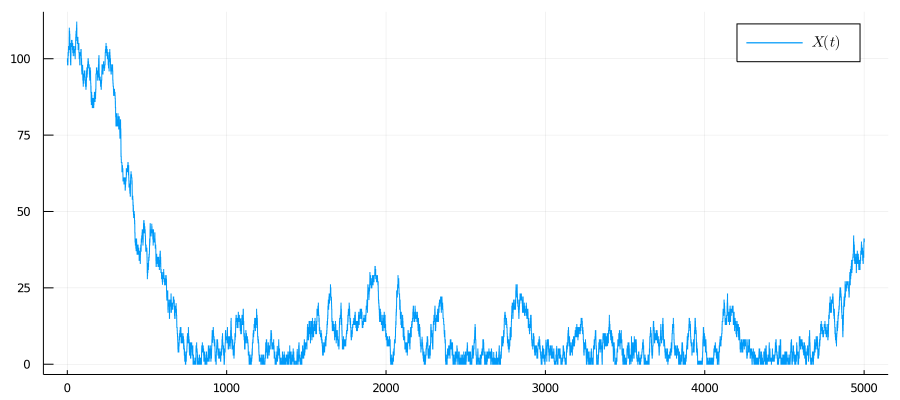

In [13]:
lambda = 0.9
mu = 1.0
x0 = 100
Tfinal = 5000.0

T,X = simula_BD(lambda,mu,x0,Tfinal)

plot(T,X,lt=:steppost, label=L"X(t)", legend=:topright)

## Ejercicio

Considere un sistema en el cual:

 * Llegan trabajos a tasa $\lambda$ cada un tiempo exponencial.
 * Los trabajos se sirven "todos juntos", una vez que se juntan $K$ trabajos. Esto lleva un tiempo exponencial de  media $1/\mu$. Durante este tiempo no se aceptan nuevos trabajos.
 
1. Analice $X(t) = $cantidad de trabajos en el sistema como una cadena de Markov de tiempo continuo. Hallar la matriz $Q$ y la distribución de régimen. 

2. Simular la cadena anterior para $K=10$.

3. Discutir cuál sería el "retardo medio" que ve un trabajo en este sistema.